In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
#Import Dataset 
df_books = pd.read_csv("D:\\TJ\\MACHINELEARNING\\BookRecommendation\\datasets\\books_data.csv");

In [3]:
df_rating = pd.read_csv("D:\\TJ\\MACHINELEARNING\\BookRecommendation\\datasets\\Books_rating.csv");

In [4]:
df_books.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,1/1/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,3/1/2003,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [5]:
df_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [6]:
books_data = pd.merge(df_books,df_rating)

In [7]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999778 entries, 0 to 2999777
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Title               object 
 1   description         object 
 2   authors             object 
 3   image               object 
 4   previewLink         object 
 5   publisher           object 
 6   publishedDate       object 
 7   infoLink            object 
 8   categories          object 
 9   ratingsCount        float64
 10  Id                  object 
 11  Price               float64
 12  User_id             object 
 13  profileName         object 
 14  review/helpfulness  object 
 15  review/score        float64
 16  review/time         int64  
 17  review/summary      object 
 18  review/text         object 
dtypes: float64(3), int64(1), object(15)
memory usage: 457.7+ MB


In [8]:
books_data.describe()

,ratingsCount,Price,review/score,review/time
count,1.639140e+06,481169.000000,2.999778e+06,2.999778e+06
mean,2.720916e+02,21.762676,4.215318e+00,1.132311e+09
std,7.888075e+02,26.206593,1.203030e+00,1.493226e+08
min,1.000000e+00,1.000000,1.000000e+00,-1.000000e+00
25%,3.000000e+00,10.780000,4.000000e+00,9.999072e+08
50%,1.000000e+01,14.930000,5.000000e+00,1.128298e+09
75%,5.500000e+01,23.950000,5.000000e+00,1.269130e+09
max,4.895000e+03,995.000000,5.000000e+00,1.362355e+09


In [9]:
#Drop Rows with missing values 
books_data=books_data.dropna()

In [10]:
#Since Dataset is huge , Sampling dataset with 4% data
books_data_sample = books_data.sample(frac=.03,random_state=1)
books_data_sample.shape

(5229, 19)

In [11]:
books_data_sample.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
638858,Candide,From the landscapes of El Dorado to Constantin...,['Voltaire'],http://books.google.com/books/content?id=45_au...,http://books.google.com/books?id=45_auwqrT9kC&...,ReadHowYouWant.com,2006,https://play.google.com/store/books/details?id...,['Fiction'],2687.0,0939495600,25.00,A1U8DHSI18EEJ1,Richard E. Noble,1/2,5.0,1266364800,The Hobo Philosopher,Voltare worte this play in response to Leibniz...
1964867,The Art of Intrusion: The Real Stories Behind ...,Hacker extraordinaire Kevin Mitnick delivers t...,"['Kevin D. Mitnick', 'William L. Simon']",http://books.google.com/books/content?id=12_GL...,http://books.google.nl/books?id=12_GLOhw5oEC&p...,John Wiley & Sons,3/17/2009,https://play.google.com/store/books/details?id...,['Computers'],12.0,B000MV89V4,3.39,AVISOVCTFJG29,Alejandro Odreman,0/2,5.0,1215043200,It's just excellent,Adequate for noobs and pros to understand how ...
512696,To Trust a Stranger,Karen Robards once again electrifes the page w...,['Karen Robards'],http://books.google.com/books/content?id=AAfMi...,http://books.google.com/books?id=AAfMi3YTq90C&...,Simon and Schuster,2/5/2002,https://play.google.com/store/books/details?id...,['Fiction'],2.0,0743466284,31.95,A3MUDAYXE0ANVM,"Christy T. French ""author""",1/2,5.0,1009411200,A Real Sizzler!,I have to say it - Wow! First book I read by M...
1817502,Journalistic Fraud: How The New York Times Dis...,"For over a hundred years, the New York Times h...",['Bob Kohn'],http://books.google.com/books/content?id=1zHhs...,http://books.google.nl/books?id=1zHhsTPrN6sC&p...,Thomas Nelson Inc,8/14/2003,http://books.google.nl/books?id=1zHhsTPrN6sC&d...,['Political Science'],1.0,B000685KVK,10.40,A1PIQ3KQZ3BQFS,John Mashey,33/36,4.0,1065398400,Another inoculation against media distortion,Kohn describes well-known techniques of unobje...
796809,A Lesson Before Dying (Library Edition Audio C...,NATIONAL BOOK CRITICS CIRCLE AWARD WINNER • A ...,['Ernest J. Gaines'],http://books.google.com/books/content?id=cV-gT...,http://books.google.com/books?id=cV-gTPZVm8wC&...,Vintage,1/20/2004,https://play.google.com/store/books/details?id...,['Fiction'],24.0,1580812287,25.95,A39U6ANNVLPJTF,"""lookalike""",2/3,4.0,974160000,I understand what Oprah saw in this book.,This book has so many good aspects to it. It d...


In [12]:
len(books_data_sample.categories.unique())


97

In [13]:
#Create Item-user matrix
#Taking 3% as sample 
books_data_sample = books_data.sample(frac=.03,random_state=1)
books_data_sample.shape

(5229, 19)

In [14]:
#Split The test and train data 60 train and 40 test
books_data_train, books_data_test = train_test_split(books_data_sample, test_size=0.4, random_state=42) 

#Create Item-user matrix using pivot_table()
rating_books_pivot_train = books_data_train.pivot_table(index='Title',values='review/score', aggfunc='mean').fillna(0) 
rating_books_pivot_test = books_data_test.pivot_table(index='Title',values='review/score', aggfunc='mean').fillna(0)

rating_books_pivot_train

,review/score
Title,
"""Forget Not Love"": The Passion of Maximilian Kolbe",5.0
"""Mom, Dad . . . I'm Pregnant"": When Your Daughter or Son Faces an Unplanned Pregnancy (TH1NK LifeChange)",5.0
'Pataphysics: The Poetics of an Imaginary Science (Avant-Garde & Modernism Studies),1.0
10 Days to Faster Reading,2.0
100 Ways to Strengthen & Unify Our Country,5.0
...,...
Zen in the Martial Arts,4.0
"Zolar's Book of Dreams, Numbers, and Lucky Days",5.0
Zondervan's Compact Bible Dictionary,5.0


In [15]:
rating_books_pivot_train.loc['comeback - a mother and daughter\'s journey through hell and back']

review/score    3.5
Name: comeback - a mother and daughter's journey through hell and back, dtype: float64

(array([  97.,    7.,   76.,   12.,    8.,  165.,   63.,  359.,  100.,
        1048.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

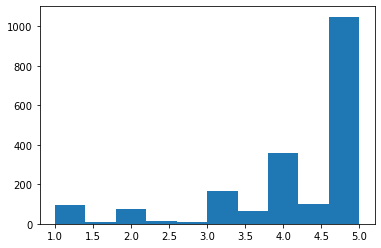

In [16]:
plt.hist(rating_books_pivot_train['review/score'].to_numpy())

In [17]:
#Build NN Model
from sklearn.neighbors import NearestNeighbors

# Build NearestNeighbors Object
model_nn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=30, n_jobs=-1)

# Fit the NearestNeighbor
model_nn.fit(rating_books_pivot_train['review/score'].to_numpy().reshape(-1, 1))

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=30)

In [18]:
# Get top 10 nearest neighbors based on rating or review/score
indices=model_nn.kneighbors(rating_books_pivot_test.loc[['comeback - a mother and daughter\'s journey through hell and back']], 10, return_distance=False)
print(indices)

# Print the recommended books
print("Recommended Books:")
print("==================")
for i in range(0, len(indices[0])):
    print((i+1),". ",rating_books_pivot_train.iloc[indices[0][i]])

[[1292 1294 1288 1289 1290 1291 1286 1293 1298 1296]]
Recommended Books:
1 .  review/score    4.0
Name: Striking Out, dtype: float64
2 .  review/score    5.0
Name: Structured Equity Derivatives: The Definitive Guide to Exotic Options and Structured Notes, dtype: float64
3 .  review/score    3.0
Name: Storyteller's Start-Up Book, dtype: float64
4 .  review/score    5.0
Name: Strange Fruit: The Biography of a Song, dtype: float64
5 .  review/score    5.0
Name: Street Dreams, dtype: float64
6 .  review/score    5.0
Name: Streiker's Bride, dtype: float64
7 .  review/score    1.0
Name: Stories Behind the Great Traditions of Christmas (Stories Behind Books), dtype: float64
8 .  review/score    5.0
Name: Strong Measures: Contemporary American Poetry In Traditional Form, dtype: float64
9 .  review/score    5.0
Name: Sun Tzu and the Art of Business: Six Strategic Principles for Managers, dtype: float64
10 .  review/score    5.0
Name: Success for Dummies, dtype: float64


D:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(


In [19]:
kmeans = KMeans(n_clusters=7, random_state=0)
cluster_labels = kmeans.fit_predict(rating_books_pivot_train['review/score'].to_numpy().reshape(-1, 1))

In [20]:
predictedLabel = kmeans.predict(rating_books_pivot_test.loc[['comeback - a mother and daughter\'s journey through hell and back']].to_numpy())
predictedLabel[0]
predictedBookIndices = np.where(kmeans.labels_ == predictedLabel[0])
print("Recommended Books:")
print("==================")
for i in range(0, 10):
    print((i+1),". ",rating_books_pivot_train.iloc[predictedBookIndices[0][i]])

Recommended Books:
1 .  review/score    4.0
Name: 1001 Winning Chess Sacrifices and Combinations, dtype: float64
2 .  review/score    4.0
Name: 3-d Negotiation: Powerful Tools to Change the Game in Your Most Important Deals, dtype: float64
3 .  review/score    4.0
Name: A Dilly of a Death, dtype: float64
4 .  review/score    4.0
Name: A House for Hermit Crab (World of Eric Carle), dtype: float64
5 .  review/score    4.222222
Name: A Hunger Like No Other (Immortals After Dark, Book 1), dtype: float64
6 .  review/score    3.833333
Name: A Lesson Before Dying (Library Edition Audio CDs) (Audio Theatre Collection), dtype: float64
7 .  review/score    4.0
Name: A Mathematical Introduction to Logic, Second Edition, dtype: float64
8 .  review/score    3.8
Name: A Salty Piece of Land, dtype: float64
9 .  review/score    4.0
Name: A Secret Love (Cynster Novels), dtype: float64
10 .  review/score    4.25
Name: APA: The Easy Way! (for APA 5th edition), dtype: float64


In [21]:
from sklearn import metrics
silhouette = metrics.silhouette_score(rating_books_pivot_train['review/score'].to_numpy().reshape(-1, 1), cluster_labels)
dunn = metrics.davies_bouldin_score(rating_books_pivot_train['review/score'].to_numpy().reshape(-1, 1), cluster_labels)
chs = metrics.calinski_harabasz_score(rating_books_pivot_train['review/score'].to_numpy().reshape(-1, 1), cluster_labels)
print("kMeans: silhouette: ", silhouette, ", dunn: ", dunn, ", chs: ", chs)

kMeans: silhouette:  0.9290905242034192 , dunn:  0.21038396081558144 , chs:  87851.46408883072


from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(rating_books_pivot_train['review/score'].to_numpy().reshape(-1, 1), 'single')
labelList = range(1, 11)
plt.figure(figsize = (10, 7))
dendrogram(linked, orientation = 'top',labels = labelList, distance_sort ='descending',show_leaf_counts = True)
plt.show()

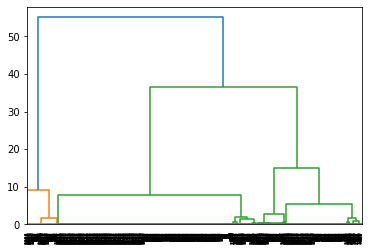

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt
dend = shc.dendrogram(shc.linkage(rating_books_pivot_train['review/score'].to_numpy().reshape(-1, 1), method = 'ward'))


In [23]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
predictedLabelAgglomerative = cluster.fit_predict(rating_books_pivot_train['review/score'].to_numpy().reshape(-1, 1))

In [24]:
silhouette_agglomerative = metrics.silhouette_score(rating_books_pivot_train['review/score'].to_numpy().reshape(-1, 1), predictedLabelAgglomerative)
dunn_aglomerative = metrics.davies_bouldin_score(rating_books_pivot_train['review/score'].to_numpy().reshape(-1, 1), predictedLabelAgglomerative)
chs_aglomerative = metrics.calinski_harabasz_score(rating_books_pivot_train['review/score'].to_numpy().reshape(-1, 1), predictedLabelAgglomerative)
print("Agglomerative: silhouette: ", silhouette_agglomerative, ", dunn: ", dunn_aglomerative, ", chs: ", chs_aglomerative)

Agglomerative: silhouette:  0.9173491741831101 , dunn:  0.24553308903448684 , chs:  68643.4950476505


In [25]:
rating_books_pivot_train_cluster = rating_books_pivot_train
rating_books_pivot_train_cluster['Cluster'] = predictedLabelAgglomerative
rating_books_pivot_train

,review/score,Cluster
Title,,
"""Forget Not Love"": The Passion of Maximilian Kolbe",5.0,5
"""Mom, Dad . . . I'm Pregnant"": When Your Daughter or Son Faces an Unplanned Pregnancy (TH1NK LifeChange)",5.0,5
'Pataphysics: The Poetics of an Imaginary Science (Avant-Garde & Modernism Studies),1.0,2
10 Days to Faster Reading,2.0,4
100 Ways to Strengthen & Unify Our Country,5.0,5
...,...,...
Zen in the Martial Arts,4.0,6
"Zolar's Book of Dreams, Numbers, and Lucky Days",5.0,5
Zondervan's Compact Bible Dictionary,5.0,5


In [26]:
cluster = rating_books_pivot_train_cluster.loc[['comeback - a mother and daughter\'s journey through hell and back']]['Cluster'][0]
predictedBookIndicesAgglomerative = np.where(predictedLabelAgglomerative == cluster)
print("Recommended Books:")
print("==================")
for i in range(0, 10):
    print((i+1),". ",rating_books_pivot_train.iloc[predictedBookIndicesAgglomerative[0][i]])

Recommen ded Books:
1 .  review/score    3.5
Cluster         3.0
Name: 1632 (The Assiti Shards), dtype: float64
2 .  review/score    3.333333
Cluster         3.000000
Name: A Dog Year: Twelve Months, Four Dogs, and Me, dtype: float64
3 .  review/score    3.833333
Cluster         3.000000
Name: A Lesson Before Dying (Library Edition Audio CDs) (Audio Theatre Collection), dtype: float64
4 .  review/score    3.25
Cluster         3.00
Name: A People's History of the United States: 1492 to Present, dtype: float64
5 .  review/score    3.8
Cluster         3.0
Name: A Salty Piece of Land, dtype: float64
6 .  review/score    3.666667
Cluster         3.000000
Name: Aaliyah : More Than a Woman, dtype: float64
7 .  review/score    3.5
Cluster         3.0
Name: All Over Creation, dtype: float64
8 .  review/score    3.5
Cluster         3.0
Name: An Acquaintance with Darkness, dtype: float64
9 .  review/score    3.5
Cluster         3.0
Name: An Infamous Army, dtype: float64
10 .  review/score    3.5
